# 👨‍💻 Code Challenge

***

### Introduction

To tackle this code challenge, I chose Python/Jupyter and SQL because I feel most comfortable using these tools and I think they are best suited for use cases like these. This notebook answers all of the questions which were asked and gives additional insights on how I tackled the challenge through comments and notes using markdown cells.

My solution contains the following steps:

- Importing relevant libraries for data wrangling and data analysis
- Loading the datasets
- Building an understanding of the datasets
- Cleaning and preprocessing the data
- Joining the datasets
- Answering the questions


***

### Importing libraries

In [1]:
import pandas as pd # data wrangling
import missingno as msno # managing missing values
import plotly.express as px # data visualization
import warnings # suppressing warnings

pd.set_option("display.max_rows", None) # setting the option to show all rows of a dataframe
warnings.filterwarnings("ignore") # suppressing warnings
%matplotlib inline 

***

### Loading the datasets

The data consists of **3 files**, two of them being **.json files** and one of them being a **.csv file**. 

First, I will load the data using Pandas which allows me to work with the data in an effective manner.

In [2]:
companies = pd.read_json('companies.json')
jobs = pd.read_json('jobs.json')
locations = pd.read_csv('locations.csv')

*** 

### 🔎 Understanding the datasets and performing data cleaning

The data was loaded successfully. Now it's time to get an **understanding of the datasets, their columns and data types.**

Where needed, I will **clean the data** before performing any data analysis on it.

### 🏭 The 'companies' dataset

How is the dataset structured?

In [3]:
print('The dataset contains', companies.shape[0], 'rows and', companies.shape[1], 'columns.')

The dataset contains 10 rows and 4 columns.


Having a look at the table:

In [4]:
companies.head(10)

,Company ID,Company Name,Establishment Date,Number of Employees
0,0,Acme Inc.,1577750400000,404
1,1,Best Corp.,1616284800000,229
2,2,Bright Future Enterprises,1605312000000,222
3,3,Delta Inc.,1604620800000,662
4,4,Echo Enterprises,1651708800000,255
5,5,Fast Track Inc.,1583625600000,374
6,6,Global Enterprises,1643846400000,896
7,7,High Hopes Inc.,1584403200000,812
8,8,Infinite Solutions,1615507200000,436
9,9,Jumpstart Corp.,1588896000000,872


The table seems pretty straightforward. It contains **10 records about different companies**.

Each company is assigned an ID and has a name. The number of employees for each company is also listed.

But the column **'Establishment Date'** seems to be stored in an unusual format. It's likely that the dates here are stored as Unix timestamps, which represent the number of milliseconds since that date. 

Using the **pandas.to_datetime()** method, the date can be formatted into a **more user-friendly format**.

Another thing which can be done is to **convert the column names into lowercase letters and replace empty spaces with underscores**.

In [5]:
companies['Establishment Date'] = pd.to_datetime(companies['Establishment Date'], unit='ms')
companies.columns = companies.columns.str.lower().str.replace(' ', '_')
companies

,company_id,company_name,establishment_date,number_of_employees
0,0,Acme Inc.,2019-12-31,404
1,1,Best Corp.,2021-03-21,229
2,2,Bright Future Enterprises,2020-11-14,222
3,3,Delta Inc.,2020-11-06,662
4,4,Echo Enterprises,2022-05-05,255
5,5,Fast Track Inc.,2020-03-08,374
6,6,Global Enterprises,2022-02-03,896
7,7,High Hopes Inc.,2020-03-17,812
8,8,Infinite Solutions,2021-03-12,436
9,9,Jumpstart Corp.,2020-05-08,872


It looks like there are **no missing values and no duplicate values**. The data looks clean and the data types and values are consistent.



*** 

### 🌎 The 'locations' dataset

In [6]:
print('The dataset contains', locations.shape[0], 'rows and', locations.shape[1], 'columns.')

The dataset contains 8 rows and 2 columns.


Having a look at the table:

In [7]:
locations.head(8)

,zip_code,location
0,10506,King's Landing
1,80976,Dorne
2,78956,Braavos
3,67305,Harrenhal
4,25089,Winterfell
5,48732,Karhold
6,35786,Tarth
7,93612,Dragonstone


This table contains **8 locations** and their **corresponding zip codes**. Since **the data looks clean and consistent**, it doesn't need any preprocessing.

***

### 💼 The 'jobs' dataset

In [8]:
print('The dataset contains', jobs.shape[0], 'rows and', jobs.shape[1], 'columns.')

The dataset contains 176 rows and 7 columns.


Having a look at the table:

In [9]:
jobs.sort_values(['id', 'updated_at']).head(20)

,updated_at,id,state,zip,price,company_id,posted_at
106,2022-01-29 11:57:00,1,posted,10506,119.34,4,2022-01-29 11:57:00
82,2022-04-13 11:43:00,1,expired,10506,119.34,4,2022-01-29 11:57:00
161,2020-10-29 04:51:00,2,posted,10506,197.89,5,2020-10-29 04:51:00
144,2021-01-20 04:54:00,2,cancelled,10506,197.89,5,2020-10-29 04:51:00
14,2021-05-19 15:46:00,3,posted,35786,335.85,8,2021-05-19 15:46:00
77,2021-07-21 15:29:00,3,expired,35786,335.85,8,2021-05-19 15:46:00
108,2021-04-03 20:16:00,4,posted,78956,150.00,6,2021-04-03 20:16:00
133,2021-06-13 20:11:00,4,expired,78956,150.00,6,2021-04-03 20:16:00
112,2022-04-07 06:58:00,5,posted,78956,158.09,8,2022-04-07 06:58:00
11,2022-06-23 06:52:00,5,expired,78956,158.09,8,2022-04-07 06:58:00


This table contains information about **job postings from companies.**

It also contains the columns **company_id** and **zip** which indicates that you can join these tables with the 'companies' and 'locations' tables.

Out of all 3 tables, this table contains **the most amount of information** because it contains **176 rows**. This means I have to be **more careful about potential data errors** before performing any data analysis.

One thing which stands out to me already is how **the same id can appear multiple times for different states**. Once a job was posted, it can eventually **expire or be cancelled**, resulting in **multiple rows for the same posting**. 

Since counting all job posting IDs for a company **will inflate the true number of active postings**, it's important to handle expired or cancelled job postings/IDs as expired or cancelled. Only those job postings which **didn't expire or were cancelled**, are to be treated as **posted or active**.

In the following cell, I will take **the latest state** of a job posting ID so that there is **only 1 row and 1 state per job posting ID**.

In [10]:
# Ensure that the updated_at column is in datetime format
jobs['updated_at'] = pd.to_datetime(jobs['updated_at'])

# Retrieve the most recently updated row for each job ID and update the jobs DataFrame in place
jobs = jobs.loc[jobs.groupby('id')['updated_at'].idxmax()]

# Display the modified DataFrame
jobs.head(20)

,updated_at,id,state,zip,price,company_id,posted_at
82,2022-04-13 11:43:00,1,expired,10506,119.34,4,2022-01-29 11:57:00
144,2021-01-20 04:54:00,2,cancelled,10506,197.89,5,2020-10-29 04:51:00
77,2021-07-21 15:29:00,3,expired,35786,335.85,8,2021-05-19 15:46:00
133,2021-06-13 20:11:00,4,expired,78956,150.00,6,2021-04-03 20:16:00
11,2022-06-23 06:52:00,5,expired,78956,158.09,8,2022-04-07 06:58:00
33,2022-05-10 16:19:00,6,cancelled,10506,375.93,5,2022-04-13 16:27:00
80,2022-10-14 21:10:00,7,cancelled,78956,36.27,0,2022-08-11 21:03:00
149,2021-03-06 09:12:00,8,posted,25089,229.14,1,2021-03-06 09:12:00
141,2021-11-05 18:25:00,9,expired,80976,499.23,4,2021-09-28 18:44:00
110,2021-01-23 16:43:00,10,posted,25089,498.05,2,2021-01-23 16:43:00


Next, I'm going to **check for missing values** using the library 'Misingno'. Missing values will be **indicated with white lines** in the following plot:

<Axes: >

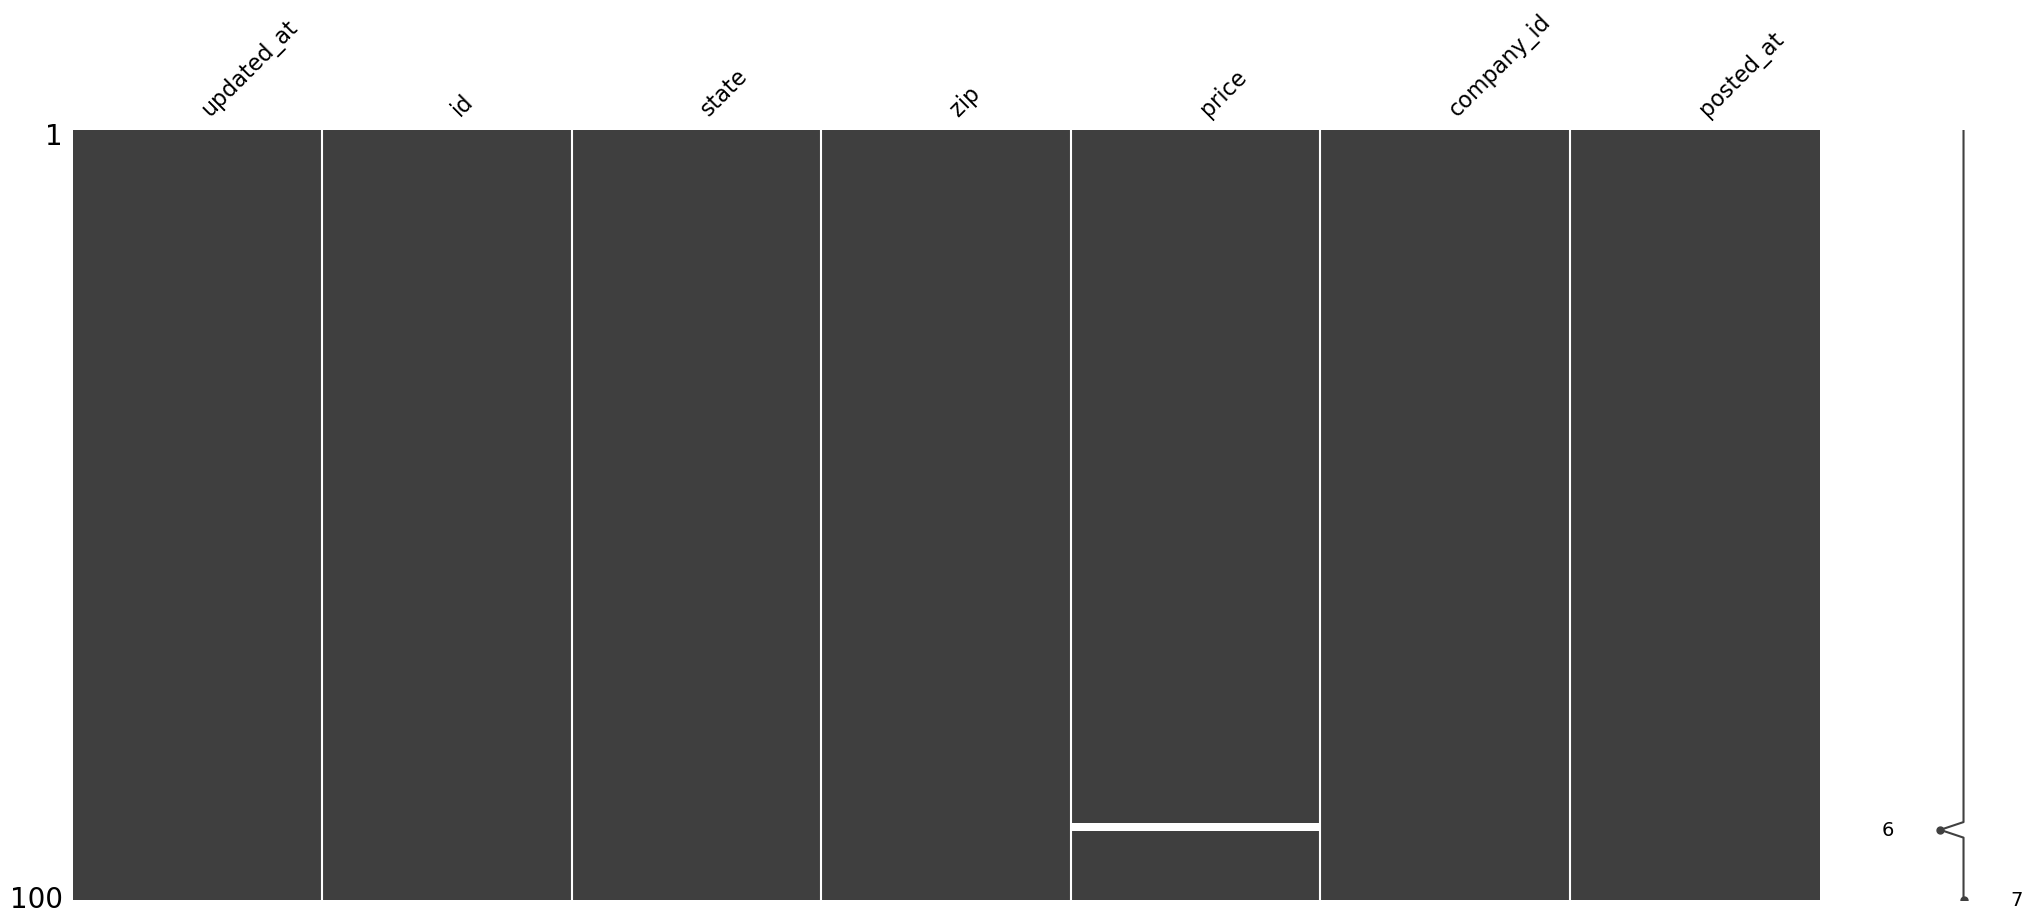

In [11]:
msno.matrix(jobs)

There is **missing information about the price**. Let's look at the rows which are affected:

In [12]:
rows_with_missing = jobs[jobs.isnull().any(axis=1)]
rows_with_missing

,updated_at,id,state,zip,price,company_id,posted_at
35,2021-03-22 22:50:00,91,expired,25089,NaN,2,2021-03-02 23:05:00


So there is **1 row where the price is not documented**. For further data analysis, it would be important to handle this row correctly.

Since there is no way to obtain the correct information, the price could be filled with the average price or median price. But this wouldn't be 100% accurate. Removing this row might not be the right decision either because removing it effects the analysis of the total number of job postings for this company. For the time being, I will **leave the row as it is**, because the price column is not needed to answer the questions.

Also: The column 'zip' **should be renamed** into 'zip_code' so it can be joined more easily with the locations table.

In [13]:
jobs = jobs.rename(columns={"zip": "zip_code"})

Since **I'm sceptical about the data**, I will have a deeper look into the values of each column. Starting with values for the **'price'** column:

In [14]:
# Get unique values and their counts
price_counts = jobs['price'].value_counts().reset_index()

# Rename the columns
price_counts.columns = ['price', 'count']

# Display the result
price_counts.sort_values('price', ascending=False)

,price,count
83,5898.00,1
66,499.23,1
65,498.05,1
53,493.62,1
24,488.10,1
97,469.47,1
61,466.63,1
43,465.41,1
23,464.94,1
85,452.67,1


It looks like there might be **an outlier** in the first row! It should be handled with care! There are **no negative prices or prices with a value of 0** which is a good sign.

Next up: The **'state'** column:

In [15]:
# Get unique values and their counts
state_counts = jobs['state'].value_counts().reset_index()

# Rename the columns
state_counts.columns = ['state', 'count']

# Display the result
state_counts.sort_values('state')

,state,count
3,canceled,1
0,cancelled,39
1,expired,34
2,posted,26


So here we have a **spelling error** which can be easily fixed by renaming the values.

In [16]:
jobs['state'] = jobs['state'].replace({'canceled': 'cancelled'})

In [17]:
# Get unique values and their counts
state_counts = jobs['state'].value_counts().reset_index()

# Rename the columns
state_counts.columns = ['state', 'count']

# Display the result
state_counts.sort_values('state')

,state,count
0,cancelled,40
1,expired,34
2,posted,26


Looking at the **'zip_code'**:

In [18]:
# Get unique values and their counts
zip_counts = jobs['zip_code'].value_counts().reset_index()

# Rename the columns
zip_counts.columns = ['zip_code', 'count']

# Display the result
zip_counts.sort_values('zip_code')

,zip_code,count
0,10506,23
3,25089,17
1,35786,22
4,78956,16
2,80976,22


**Nothing unusual**, that's good! Having a look at the **'company_id'**:

In [19]:
# Get unique values and their counts
company_id_counts = jobs['company_id'].value_counts().reset_index()

# Rename the columns
company_id_counts.columns = ['company_id', 'count']

# Display the result
company_id_counts.sort_values('company_id')

,company_id,count
7,0,9
5,1,10
8,2,8
1,3,13
2,4,12
4,5,10
0,6,16
6,7,10
3,8,12


And finally: **id**

In [20]:
# Get unique values and their counts
id_counts = jobs['id'].value_counts().reset_index()

# Rename the columns
id_counts.columns = ['id', 'count']

# Display the result
id_counts.sort_values('id')

,id,count
0,1,1
13,2,1
73,3,1
72,4,1
71,5,1
70,6,1
69,7,1
68,8,1
67,9,1
66,10,1


**Looks good!** Now I want to check **for duplicate values:**:

In [21]:
duplicate_rows = jobs[jobs.duplicated(keep=False)]
duplicate_rows

,updated_at,id,state,zip_code,price,company_id,posted_at


No duplicate values!

***

### All datasets are clean! Time to join them together ✅

In [22]:
# Merging dataframes
cleaned_df = jobs.merge(locations, on='zip_code', how='left')
cleaned_df = cleaned_df.merge(companies, on='company_id', how='left')

# Renaming the id columns
cleaned_df = cleaned_df.rename(columns={"id": "job_posting_id"})

# Rearranging columns
cleaned_df = cleaned_df[['job_posting_id', 
                       'posted_at', 
                       'updated_at', 
                       'state', 
                       'price',
                       'company_id', 
                       'company_name', 
                       'establishment_date',
                       'zip_code',
                       'location',
                       'number_of_employees']].sort_values('job_posting_id', ascending=True).reset_index(drop=True)

cleaned_df.head(10)

,job_posting_id,posted_at,updated_at,state,price,company_id,company_name,establishment_date,zip_code,location,number_of_employees
0,1,2022-01-29 11:57:00,2022-04-13 11:43:00,expired,119.34,4,Echo Enterprises,2022-05-05,10506,King's Landing,255
1,2,2020-10-29 04:51:00,2021-01-20 04:54:00,cancelled,197.89,5,Fast Track Inc.,2020-03-08,10506,King's Landing,374
2,3,2021-05-19 15:46:00,2021-07-21 15:29:00,expired,335.85,8,Infinite Solutions,2021-03-12,35786,Tarth,436
3,4,2021-04-03 20:16:00,2021-06-13 20:11:00,expired,150.00,6,Global Enterprises,2022-02-03,78956,Braavos,896
4,5,2022-04-07 06:58:00,2022-06-23 06:52:00,expired,158.09,8,Infinite Solutions,2021-03-12,78956,Braavos,436
5,6,2022-04-13 16:27:00,2022-05-10 16:19:00,cancelled,375.93,5,Fast Track Inc.,2020-03-08,10506,King's Landing,374
6,7,2022-08-11 21:03:00,2022-10-14 21:10:00,cancelled,36.27,0,Acme Inc.,2019-12-31,78956,Braavos,404
7,8,2021-03-06 09:12:00,2021-03-06 09:12:00,posted,229.14,1,Best Corp.,2021-03-21,25089,Winterfell,229
8,9,2021-09-28 18:44:00,2021-11-05 18:25:00,expired,499.23,4,Echo Enterprises,2022-05-05,80976,Dorne,255
9,10,2021-01-23 16:43:00,2021-01-23 16:43:00,posted,498.05,2,Bright Future Enterprises,2020-11-14,25089,Winterfell,222


In [23]:
cleaned_df.shape

(100, 11)

***

## Answering the questions ❓

### 1. Which location currently has the most jobs in either the active or expired state?

Answer: **Dorne** has the most jobs in the **active state**, **Tarth** has the most jobs in the **expired state**.

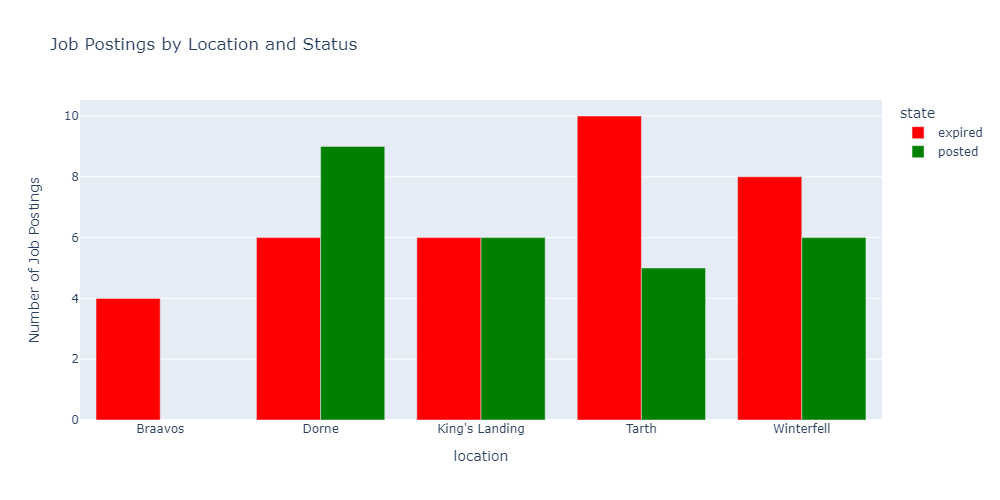

In [24]:
# Filter data based on state: posted or expired
filtered_df = cleaned_df[(cleaned_df['state'] == 'posted') | (cleaned_df['state'] == 'expired')]

# Group by location and state. Then transform from Pandas series to dataframe
grouped = filtered_df.groupby(['location', 'state']).size()
grouped = grouped.reset_index(name='count')

# Create a bar chart on the grouped dataframe
color_map = {
    'expired': 'red', 
    'posted': 'green'
}

fig = px.bar(grouped, 
             x='location', 
             y='count', 
             color='state',
             barmode='group',
             color_discrete_map=color_map,
             title='Job Postings by Location and Status',
             labels={'count': 'Number of Job Postings', 'status': 'Job Status'}
            )

fig.update_layout(width=1000, height=500)
fig.show("png")

***

### 2. In which month were the most jobs cancelled?

Answer: Throughout the whole timeframe, the most job postings were cancelled **in June.**

Note: I based the result on the **updated_at** column because it seemed more appropriate as a basis for cancellations than the **posted_at** column.

In [25]:
# Filter data based on state: cancelled
filtered_df = cleaned_df[(cleaned_df['state'] == 'cancelled')]

# Extract the month from the column updated_at
filtered_df['month'] = filtered_df['updated_at'].dt.month

# Group by month
grouped = filtered_df.groupby('month').size()
grouped

month
1     4
2     2
3     3
4     3
5     4
6     6
7     2
8     4
9     4
10    3
11    2
12    3
dtype: int64

***
### 3. Which company has the highest ratio of posted jobs to employee count?

Answer: **Best Corp.**

Note: I defined posted jobs as **active jobs**.

In [26]:
# Filter data based on state: posted
filtered_df = cleaned_df[(cleaned_df['state'] == 'posted')]

# Group by company_name, number_of_employees
job_posting_counts = filtered_df.groupby(['company_name', 'number_of_employees']).size().reset_index(name='job_posting_count')

# Calculate the job_to_employee_ratio 
job_posting_counts['job_to_employee_ratio'] = job_posting_counts['job_posting_count'] / job_posting_counts['number_of_employees']

# Sort the table by job_to_employee_ratio
job_posting_counts.sort_values('job_to_employee_ratio', ascending=False)

,company_name,number_of_employees,job_posting_count,job_to_employee_ratio
0,Best Corp.,229,4,0.017467
1,Bright Future Enterprises,222,3,0.013514
3,Echo Enterprises,255,3,0.011765
2,Delta Inc.,662,5,0.007553
7,Infinite Solutions,436,3,0.006881
5,Global Enterprises,896,5,0.005580
4,Fast Track Inc.,374,2,0.005348
6,High Hopes Inc.,812,1,0.001232


***

### 4. Develop the SQL to define a dimensional model schema for this data. Document (or be ready to discuss) any design decisions that you make.

### Thoughts behind my approach:

Instead of putting all information in one big table, **a star schema** can help with **usability and query performance** by seperating data into **a fact table and dimension tables**.

This approach helps with **clear segregation** between transactional or measurable data and dimensional data, **keeping the overall complexity lower**.

The dimension tables **shouldn't be too granular** as this can **increase complexity and can manifest in many JOIN statements**.

Additionally, certain columns like **posted_at** can be **partitioned for faster data processing**.

Seperating the tables makes it **easier to adjust** them in the future instead of adjusting one big table which might be **prone to slow data processing** because of the table size. 

In [27]:
"""

-- Fact table for job postings (central table in the schema, links to dimension tables through keys and contains metrics)

CREATE OR REPLACE TABLE `company_project.company_data_set.fact_job_postings`
(
    job_posting_id INT64,
    company_id INT64,
    zip_code STRING,
    posted_at DATE,
    updated_at DATE,
    state STRING,
    price NUMERIC
) 
PARTITION BY posted_at;


-- Dimension table for company information

CREATE OR REPLACE TABLE `company_project.company_data_set.dim_company` 
(
    company_id INT64,
    company_name STRING,
    number_of_employees INT64,
    establishment_date DATE
);


-- Dimension table for location information

CREATE OR REPLACE TABLE `company_project.company_data_set.dim_location` 
(
    zip_code STRING,
    location STRING
);


"""

'\n\n-- Fact table for job postings (central table in the schema, links to dimension tables through keys and contains metrics)\n\nCREATE OR REPLACE TABLE `company_project.company_data_set.fact_job_postings`\n(\n    job_posting_id INT64,\n    company_id INT64,\n    zip_code STRING,\n    posted_at DATE,\n    updated_at DATE,\n    state STRING,\n    price NUMERIC\n) \nPARTITION BY posted_at;\n\n\n-- Dimension table for company information\n\nCREATE OR REPLACE TABLE `company_project.company_data_set.dim_company` \n(\n    company_id INT64,\n    company_name STRING,\n    number_of_employees INT64,\n    establishment_date DATE\n);\n\n\n-- Dimension table for location information\n\nCREATE OR REPLACE TABLE `company_project.company_data_set.dim_location` \n(\n    zip_code STRING,\n    location STRING\n);\n\n\n'

***

### 5. Using your dimensional model, write a SQL query that returns a list of jobs for each company, ordered and enumerated within each group by the posted_at date.

In [28]:
"""

SELECT 
b.company_name,
a.job_posting_id,
a.posted_at,
a.updated_at,
a.state,
a.price,
ROW_NUMBER() OVER (PARTITION BY a.company_id ORDER BY a.posted_at ASC) AS job_order

FROM `company_project.company_data_set.fact_job_postings` AS a

LEFT JOIN `company_project.company_data_set.dim_company` AS b
USING(company_id)

ORDER BY company_name, job_posting_id, job_order;


"""

'\n\nSELECT \nb.company_name,\na.job_posting_id,\na.posted_at,\na.updated_at,\na.state,\na.price,\nROW_NUMBER() OVER (PARTITION BY a.company_id ORDER BY a.posted_at ASC) AS job_order\n\nFROM `company_project.company_data_set.fact_job_postings` AS a\n\nLEFT JOIN `company_project.company_data_set.dim_company` AS b\nUSING(company_id)\n\nORDER BY company_name, job_posting_id, job_order;\n\n\n'

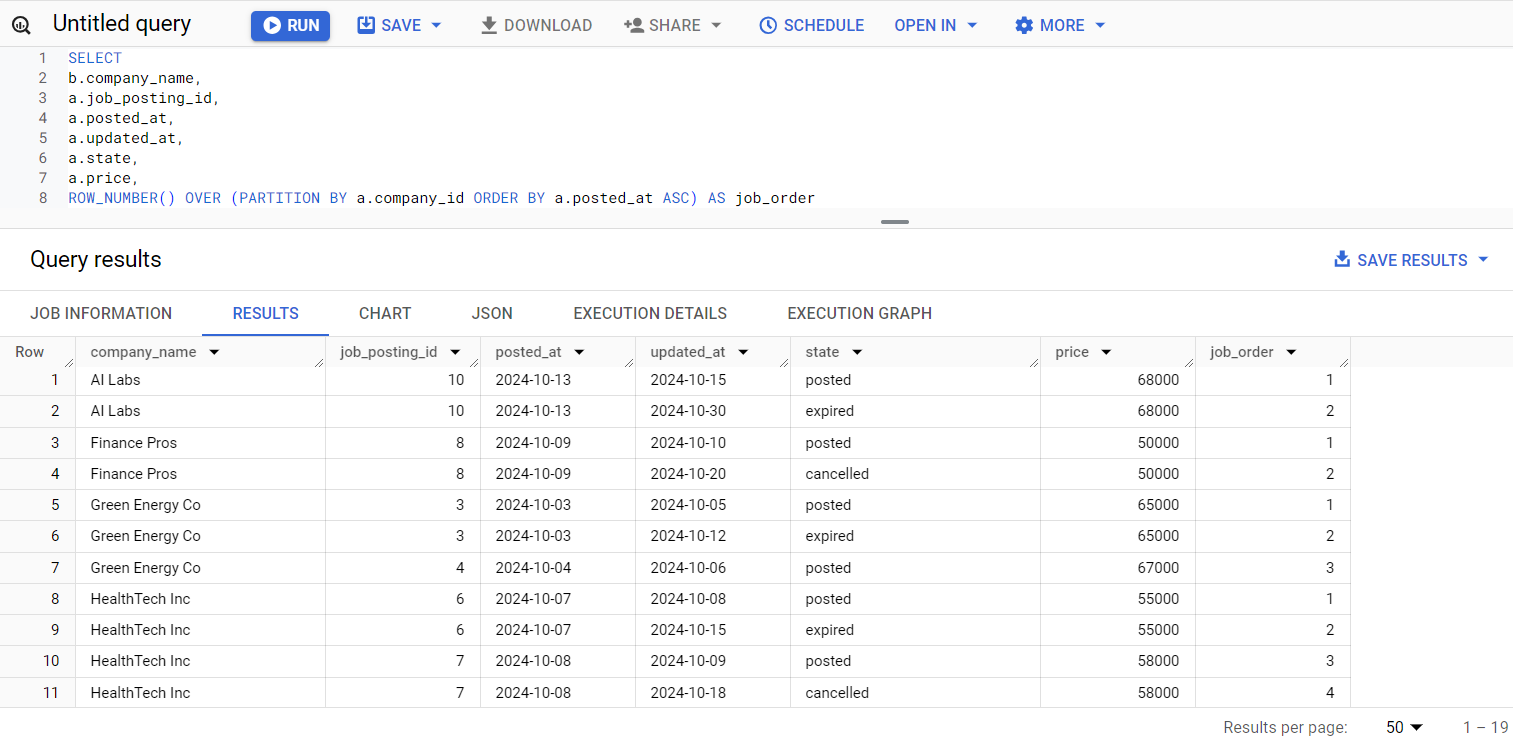

### Explanation:

The fact table fact_job_postings is the main table and contains a lot of important information already but **needs to be joined with the dim_company table** to obtain the **company_name**.

The window function **ROW_NUMBER() OVER()** allows me to partition my data by company_id and to **enumerate the job postings per company_id**. Then, I can **sort the job order** by the **posted_at** date, starting with the oldest entry.

***

### 6. Discuss how you would obtain and model information (within your schema) about the duration of jobs (from posted to expired states).

In [29]:
"""

CREATE OR REPLACE TABLE `company_project.company_data_set.fact_job_postings`
(
    job_posting_id INT64,
    company_id INT64,
    zip_code STRING,
    posted_at DATE,
    updated_at DATE,
    expired_at DATE, -- new column
    state STRING,
    price NUMERIC
) 
PARTITION BY posted_at;


"""

'\n\nCREATE OR REPLACE TABLE `company_project.company_data_set.fact_job_postings`\n(\n    job_posting_id INT64,\n    company_id INT64,\n    zip_code STRING,\n    posted_at DATE,\n    updated_at DATE,\n    expired_at DATE, -- new column\n    state STRING,\n    price NUMERIC\n) \nPARTITION BY posted_at;\n\n\n'

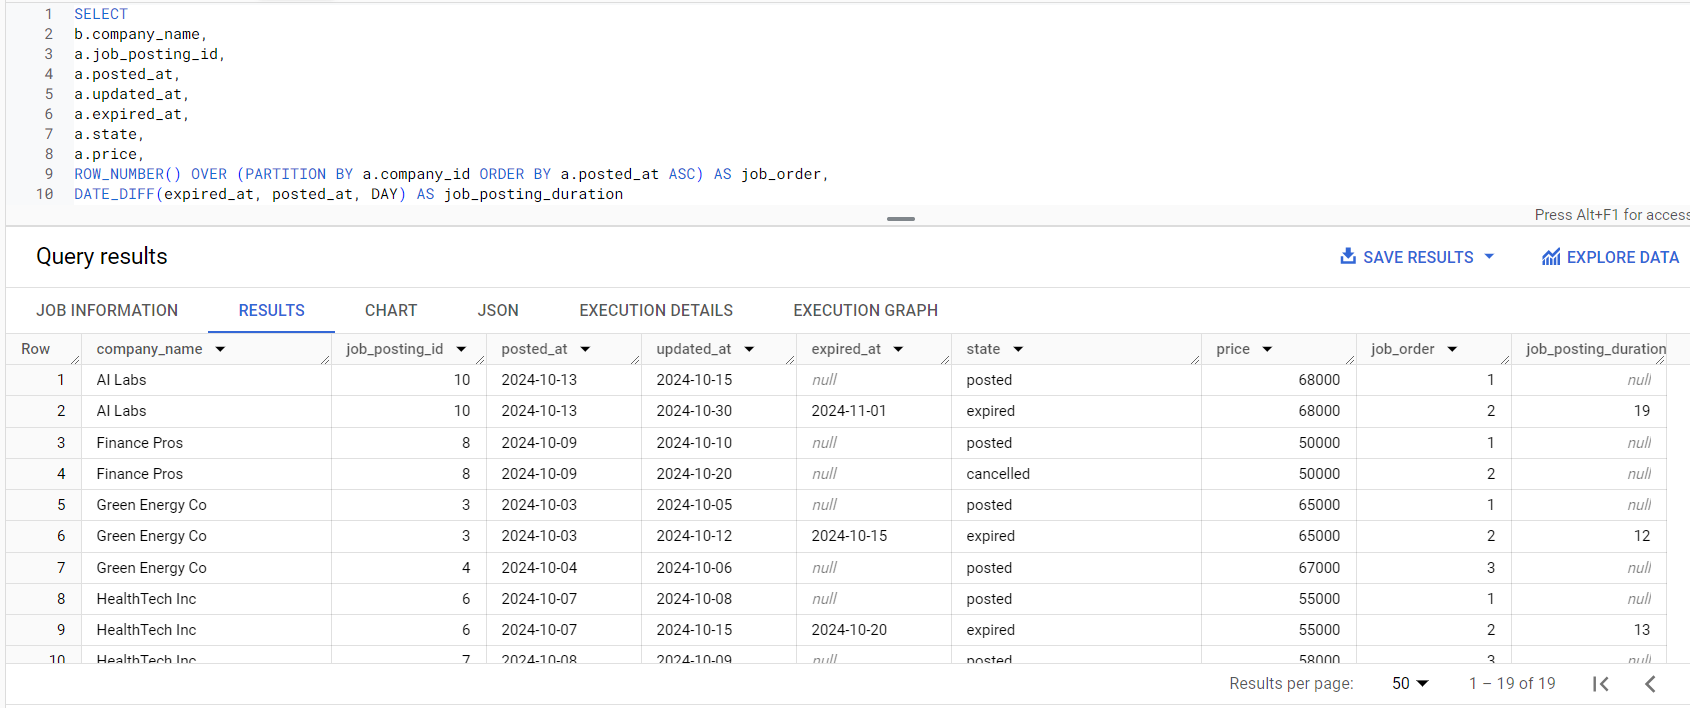

### Explanation:

In order to obtain information about the duration of a job posting, a new column called **expired_at** can be added in the fact_table.

With that, you can calculate the time difference between two dates using **DATE_DIFF** which returns **the duration between two dates**.

***

### 7. (For Data Analyst Role) Provide a visualization showing the trend of the number of active jobs over time. Also include the company name data in this visualization.

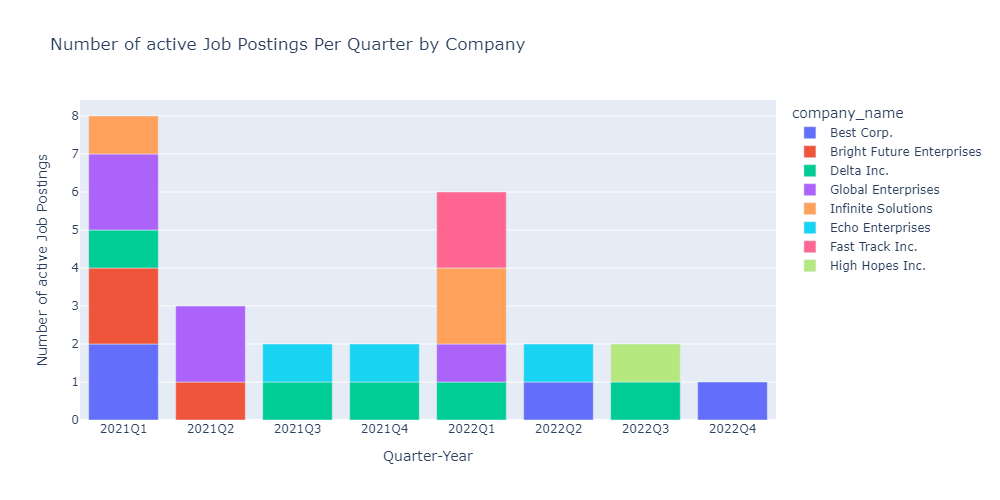

In [30]:
# Filter data based on state: posted
filtered_df = cleaned_df[(cleaned_df['state'] == 'posted')]

# Convert posted_at to datetime
filtered_df['posted_at'] = pd.to_datetime(filtered_df['posted_at'])

# Create a new column for Quarter-Year
filtered_df['quarter_year'] = filtered_df['posted_at'].dt.to_period('Q')

# Group by Quarter-Year and company_name and count the job_posting_id for each group
job_postings_per_quarter = filtered_df.groupby(['quarter_year', 'company_name']).size().reset_index(name='job_count')

# Convert quarter_year to string for better plotting
job_postings_per_quarter['quarter_year'] = job_postings_per_quarter['quarter_year'].astype(str)

# Sort quarter_years and ensure all are displayed
quarters_sorted = sorted(job_postings_per_quarter['quarter_year'].unique())

# Plot
fig = px.bar(job_postings_per_quarter,
             x='quarter_year',
             y='job_count',
             color='company_name',
             labels={'quarter_year': 'Quarter-Year', 'job_count': 'Number of active Job Postings'},
             title='Number of active Job Postings Per Quarter by Company',
             category_orders={'quarter_year': quarters_sorted}) 

fig.update_layout(width=1000, height=500)
fig.show("png")

*** 

### 💭 Final thoughts:

This coding challenge was very engaging as it required a wide range of key skills, including data loading, being sceptical about data quality, data cleaning, joining data and data visualization. Additionally, the questions about developing a data model were interesting as these questions usually cater more towards the skills of Data Engineers.

All in all, it was a lot of fun to answer the questions and to participate in this coding challenge!

Thank you for reading through my solution and for giving me the opportunity to showcase my results!